
The size of the image will be reduced by a factor of 4.0

Compression rate = 75.0%


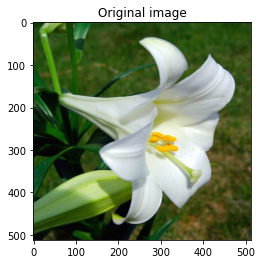

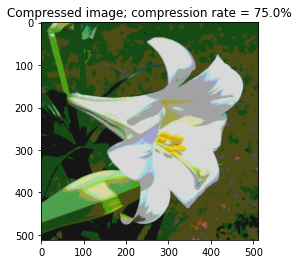

In [37]:
import argparse
from imageio import imread
import numpy as np
from scipy import misc 
from sklearn import cluster
import matplotlib.pyplot as plt

'''
def build_arg_parser():
    parser = argparse.ArgumentParser(description='Compress the input image \
            using clustering')
    parser.add_argument("--input-file", dest="input_file", required=True,
            help="Input image")
    parser.add_argument("--num-bits", dest="num_bits", required=False,
            type=int, help="Number of bits used to represent each pixel")
    return parser
'''
def compress_image(img, num_clusters):
    # Convert input image into (num_samples, num_features) 
    # array to run kmeans clustering algorithm 
    X = img.reshape((-1, 1))  

    # Run kmeans on input data
    kmeans = cluster.KMeans(n_clusters=num_clusters, n_init=4, random_state=5)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_.squeeze()
    labels = kmeans.labels_

    # Assign each value to the nearest centroid and 
    # reshape it to the original image shape
    input_image_compressed = np.choose(labels, centroids).reshape(img.shape)

    return input_image_compressed

def plot_image(img, title):
    vmin = img.min()
    vmax = img.max()
    plt.figure()
    plt.title(title)
    plt.imshow(img, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

if __name__=='__main__':
    #args = build_arg_parser().parse_args()
    #input_file = args.input_file
    #num_bits = args.num_bits

    #if not 1 <= num_bits <= 8:
        #raise TypeError('Number of bits should be between 1 and 8')
    input_file = 'flower_image.jpg'
    num_bits = 2
    num_clusters = np.power(2, num_bits)

    # Print compression rate
    compression_rate = round(100 * (8.0 - num_bits) / 8.0, 2)
    print("\nThe size of the image will be reduced by a factor of", 8.0/num_bits)
    print("\nCompression rate = " + str(compression_rate) + "%")

    # Load input image
    input_image = imread(input_file).astype(np.uint8)

    # original image 
    plot_image(input_image, 'Original image')

    # compressed image 
    input_image_compressed = compress_image(input_image, num_clusters).astype(np.uint8)
    plot_image(input_image_compressed, 'Compressed image; compression rate = ' 
            + str(compression_rate) + '%')

    plt.show()


The size of the image will be reduced by a factor of 8.0

Compression rate = 87.5%


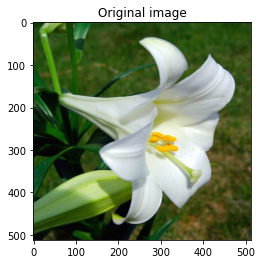

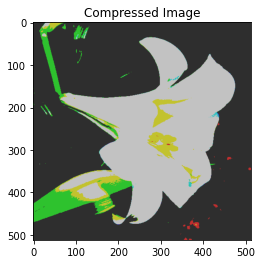

In [40]:
# 将每个像素的压缩比特数降到2，再执行压缩

input_file = 'flower_image.jpg'
num_bits = 1
num_clusters = np.power(2, num_bits)

# Print compression rate
compression_rate = round(100 * (8.0 - num_bits) / 8.0, 2)
print("\nThe size of the image will be reduced by a factor of", 8.0/num_bits)
print("\nCompression rate = " + str(compression_rate) + "%")

# Load input image
img = imread(input_file).astype(np.uint8)

# original image 
plot_image(img, 'Original image')



X = img.reshape((-1, 1))  
kmeans = cluster.KMeans(n_clusters=num_clusters, n_init=4, random_state=5)
kmeans.fit(X)
centroids = kmeans.cluster_centers_.squeeze()
labels = kmeans.labels_
input_image_compressed = np.choose(labels, centroids).reshape(img.shape)
input_image_compressed = input_image_compressed.astype(np.uint8)
vmin = input_image_compressed.min()
vmax = input_image_compressed.max()
plt.figure()
plt.title("Compressed Image")
plt.imshow(input_image_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
plt.show()